# Development for slides

In [27]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
import seaborn as sns

sns.set_style("whitegrid")

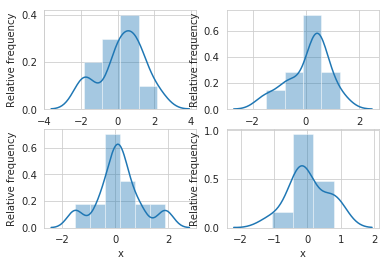

In [28]:
## Generate histograms of normal data and non-normal data.

## First, normal data and their histograms.
# Make 4 normal samples and facetgrid them.

# number in sample
n = 10

# number of samples
n_samples = 4

# Define mu and sigma for the normal distribution
mu = 0
sigma = 1


for i in np.arange(n_samples):
    
    normal_sample = np.random.normal(mu, sigma, n)
    plt.subplot(2, 2, i+1)
    sns.distplot(normal_sample)
    plt.xlabel('x')
    plt.ylabel('Relative frequency')


In [29]:
#### Need some hella left skew and right skew and outlier stuff


In [30]:
# Example of non-linear quantile plot -- maybe actual data here. Examine datasets we've used previously in the course!

# Maybe temperature or gene expression or brain one


In [31]:
# Shapiro-Wilk test example.
class_data = np.genfromtxt("data/data.tsv", delimiter = "\t", skip_header=True, usecols=(1,2))

jumping_jacks = np.array(class_data[:, 1])
np.random.shuffle(jumping_jacks)

jumping_jacks

array([35., 26., 39., 33., 60., 35., 34., 21., 39., 43., 65., 42., 43.,
       38., 39., 37., 30., 32., 41., 35., 38., 35., 29., 30., 32., 32.,
       42., 37., 32., 48., 25., 42., 25., 78., 44., 51., 32., 34., 15.,
       37., 35., 45., 44., 45., 44., 31., 35., 20., 36., 31., 45.])

In [32]:
first_digits = np.array(class_data[:, 0])
np.random.shuffle(first_digits)

first_digits

array([3., 4., 9., 1., 4., 2., 5., 1., 2., 2., 7., 6., 5., 8., 6., 1., 1.,
       9., 3., 4., 4., 3., 6., 3., 9., 1., 4., 2., 9., 1., 3., 1., 5., 6.,
       5., 9., 1., 4., 2., 9., 1., 1., 1., 2., 1., 6., 3., 6., 8., 3., 9.])

In [33]:
## Read in ppin network
import networkx as nx

ACTN3_df = pd.read_csv('data/ACTN3_network.tsv', sep='\t', header=0)
ACTN3_df

,node1,node2,node1_string_internal_id,node2_string_internal_id,node1_external_id,node2_external_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
0,TLN1,VCL,4439035,4432848,9606.ENSP00000316029,9606.ENSP00000211998,0,0,0.0,0.000,0.144,0.974,0.9,0.855,0.999
1,PXN,VCL,4435751,4432848,9606.ENSP00000267257,9606.ENSP00000211998,0,0,0.0,0.000,0.097,0.927,0.9,0.979,0.999
2,TNNI2,TNNT3,4445617,4436281,9606.ENSP00000371331,9606.ENSP00000278317,0,0,0.0,0.000,0.929,0.454,0.9,0.902,0.999
3,TNNI2,TNNC1,4445617,4433570,9606.ENSP00000371331,9606.ENSP00000232975,0,0,0.0,0.000,0.087,0.974,0.9,0.724,0.999
4,TNNI2,TNNC2,4445617,4443965,9606.ENSP00000371331,9606.ENSP00000361636,0,0,0.0,0.000,0.920,0.868,0.9,0.739,0.999
5,ACTN1,ACTN4,4446270,4434247,9606.ENSP00000377941,9606.ENSP00000252699,0,0,0.0,0.982,0.107,0.997,0.9,0.725,0.999
6,ACTN1,VCL,4446270,4432848,9606.ENSP00000377941,9606.ENSP00000211998,0,0,0.0,0.000,0.273,0.974,0.9,0.770,0.999
7,TNNC2,TNNT3,4443965,4436281,9606.ENSP00000361636,9606.ENSP00000278317,0,0,0.0,0.000,0.911,0.700,0.9,0.731,0.999
8,NEB,TTN,4451845,4450840,9606.ENSP00000484342,9606.ENSP00000467141,0,0,0.0,0.000,0.926,0.454,0.9,0.920,0.999
9,TNNI3,TNNC1,4441191,4433570,9606.ENSP00000341838,9606.ENSP00000232975,0,0,0.0,0.000,0.177,0.974,0.9,0.657,0.999


In [34]:
####### For exercise: have students run shapiro wilk test

# Filter expression>0
ACTN3_df_filtered = ACTN3_df[ACTN3_df["combined_score"]>0.6]
ACTN3_df_filtered.reindex()

,node1,node2,node1_string_internal_id,node2_string_internal_id,node1_external_id,node2_external_id,neighborhood_on_chromosome,gene_fusion,phylogenetic_cooccurrence,homology,coexpression,experimentally_determined_interaction,database_annotated,automated_textmining,combined_score
0,TLN1,VCL,4439035,4432848,9606.ENSP00000316029,9606.ENSP00000211998,0,0,0.0,0.000,0.144,0.974,0.90,0.855,0.999
1,PXN,VCL,4435751,4432848,9606.ENSP00000267257,9606.ENSP00000211998,0,0,0.0,0.000,0.097,0.927,0.90,0.979,0.999
2,TNNI2,TNNT3,4445617,4436281,9606.ENSP00000371331,9606.ENSP00000278317,0,0,0.0,0.000,0.929,0.454,0.90,0.902,0.999
3,TNNI2,TNNC1,4445617,4433570,9606.ENSP00000371331,9606.ENSP00000232975,0,0,0.0,0.000,0.087,0.974,0.90,0.724,0.999
4,TNNI2,TNNC2,4445617,4443965,9606.ENSP00000371331,9606.ENSP00000361636,0,0,0.0,0.000,0.920,0.868,0.90,0.739,0.999
5,ACTN1,ACTN4,4446270,4434247,9606.ENSP00000377941,9606.ENSP00000252699,0,0,0.0,0.982,0.107,0.997,0.90,0.725,0.999
6,ACTN1,VCL,4446270,4432848,9606.ENSP00000377941,9606.ENSP00000211998,0,0,0.0,0.000,0.273,0.974,0.90,0.770,0.999
7,TNNC2,TNNT3,4443965,4436281,9606.ENSP00000361636,9606.ENSP00000278317,0,0,0.0,0.000,0.911,0.700,0.90,0.731,0.999
8,NEB,TTN,4451845,4450840,9606.ENSP00000484342,9606.ENSP00000467141,0,0,0.0,0.000,0.926,0.454,0.90,0.920,0.999
9,TNNI3,TNNC1,4441191,4433570,9606.ENSP00000341838,9606.ENSP00000232975,0,0,0.0,0.000,0.177,0.974,0.90,0.657,0.999


In [19]:
ACTN3_df_filtered.filter(items = ["node1", "node2"])

,node1,node2
0,TLN1,VCL
1,PXN,VCL
2,TNNI2,TNNT3
3,TNNI2,TNNC1
4,TNNI2,TNNC2
...,...,...
301,TTN,VCL
302,ACTN1,TNNT3
303,TNNT3,ACTN4
304,TPM2,GSN


In [20]:
node_names1 = ACTN3_df["node1"].unique()
node_names2 = ACTN3_df["node2"].unique()
node_names = list(set(node_names1) | set(node_names2)) 
print(node_names)

['MYL1', 'TPM2', 'ACTA1', 'TNNC2', 'TNNC1', 'TPM3', 'ACTN3', 'TNNI3', 'TNNT2', 'TTN', 'ACTN4', 'GSN', 'VASP', 'ZYX', 'VCL', 'TNNT3', 'PXN', 'TNNI2', 'MYBPC2', 'TCAP', 'TNNI1', 'ACTN1', 'MYH8', 'TPM4', 'ACTN2', 'MYH3', 'TPM1', 'NEB', 'TLN1', 'MYH6', 'CTNNA1']


In [21]:
G = nx.Graph()

def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys



dict1 = dict(zip(np.arange(np.size(node_names)),node_names))

G.add_nodes_from(np.arange(np.size(node_names)))  #Nodes added.

n_edges = ACTN3_df_filtered.shape[0]
n_edges

for node1, node2 in zip(ACTN3_df_filtered.node1,ACTN3_df_filtered.node2):
    
    # Find index of node1
    ind1 = getKeysByValue(dict1, node1)
    ind2 = getKeysByValue(dict1, node2)
    
    G.add_edge(ind1[0], ind2[0])
    


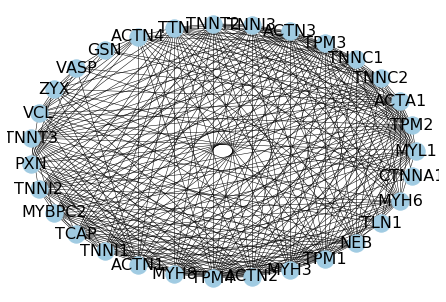

In [22]:
nx.set_node_attributes(G,values = dict1, name = "name")
pos = nx.circular_layout(G)
nx.draw(G, pos, node_color='#A0CBE2',
        width=0.5, edge_cmap=plt.cm.Blues)
nx.draw_networkx_labels(G,pos,dict1,font_size=16)
plt.show()

In [23]:
np.array(G.degree())
degree_array = np.zeros(G.number_of_nodes())
for node in G.nodes():
    print(G.degree(node))
    degree_array[node] = G.degree(node)

21
27
26
23
20
26
27
21
21
24
17
6
7
11
16
23
14
21
20
20
21
18
21
26
27
21
27
21
12
21
6


In [26]:
degree_array

array([21., 27., 26., 23., 20., 26., 27., 21., 21., 24., 17.,  6.,  7.,
       11., 16., 23., 14., 21., 20., 20., 21., 18., 21., 26., 27., 21.,
       27., 21., 12., 21.,  6.])

In [38]:
degree_array = [12, 7, 8, 9, 3, 7, 8, 15, 6, 10, 8, 4, 10, 5, 1, 16, 15, 18, 15, 8, 4, 14, 7, 6, 5, 13, 14, 17, 22, 9, 0]

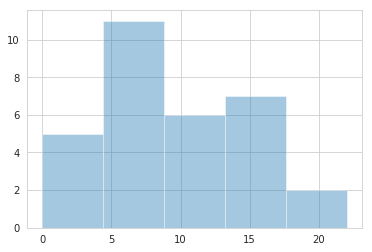

In [40]:
sns.distplot(degree_array, kde = False)

In [15]:
G.number_of_nodes


<bound method Graph.number_of_nodes of <networkx.classes.graph.Graph object at 0x7ff687d9ad68>>